In [2]:
!pip install textblob
!pip install langdetect
!pip install wordcloud 
!pip install spacy
!pip install openpyxl
!pip install spacy_langdetect

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=61f7e37102f986b69268c26a482ea08b489ec2ab72ec77a4f33fd5f319a4e336
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 48.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 38.1 MB/s eta 0:00:00
You should consider 

In [1]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string
import openpyxl
from langdetect import detect
import nltk
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy_langdetect import LanguageDetector
import spacy

In [3]:
df = pd.read_excel("Data comentarios.xlsx")
df

,Comment,Likes,Time,nombre_video,id
0,¡Suscríbete y sigue aprendiendo!► https://bit....,1,hace 5 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0
1,Las mejores clases sin duda️,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0
2,Muchas gracias por los tutoriales,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0
3,Gracias por compartir,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0
4,¡Suscríbete y sigue aprendiendo!► https://bit....,1,hace 5 días,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U
...,...,...,...,...,...
700,Alguna laptop barata que pueda correr el progr...,0,hace 1 año,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec
701,hola.como hago por favor de recortar una image...,0,hace 11 meses,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec
702,La versión 2021 solo sirve en Windows 10,1,hace 1 año,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec
703,la Tableta que tu dices es para instalarlo,0,hace 2 semanas,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words_nltk_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+', '', str(text))
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', str(text))
    text = re.sub(r'#', '', str(text))
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text))
    tokens = nltk.word_tokenize(str(text))
    tokens = [word for word in tokens if word not in stop_words_nltk_es]
    text = (" ").join(tokens)
    return text

In [6]:
# Quitar tildes de columnas Dataframe
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s


In [69]:
def get_polarity(text):
    analysis = TextBlob(text)
    if text != '':
      if detect(text) == 'es':
          result = analysis.translate(from_lang = 'es', to = 'en').sentiment.polarity
          time.sleep(10)
          return result
      elif detect(text) != 'pt':
          result = analysis.translate(from_lang = 'pt', to = 'en').sentiment.polarity
          time.sleep(10)
          return result
      else:
          result = analysis.sentiment.polarity
          return result
      

In [9]:
df['clean_text'] = df['Comment'].apply(clean_text)
df['clean_text']

0      ¡Suscríbete sigue aprendiendo ! ► ► Invideo Re...
1                               Las mejores clases duda️
2                              Muchas gracias tutoriales
3                                      Gracias compartir
4      ¡Suscríbete sigue aprendiendo ! ► ► Invideo Re...
                             ...                        
700    Alguna laptop barata pueda correr programa for...
701    hola.como hago favor recortar imagen pegarla l...
702                La versión 2021 solo sirve Windows 10
703                             Tableta dices instalarlo
704                                Hola porq corel traba
Name: clean_text, Length: 705, dtype: object

In [22]:
df['clean_text_lower'] =df['clean_text'].str.lower()
df['clean_text_lower'] = [normalize(i) for i in df.clean_text_lower]

In [23]:
df.head()

,Comment,Likes,Time,nombre_video,id,clean_text,language,clean_text_lower
1,Las mejores clases sin duda️,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Las mejores clases duda️,es,las mejores clases duda️
2,Muchas gracias por los tutoriales,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Muchas gracias tutoriales,es,muchas gracias tutoriales
3,Gracias por compartir,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Gracias compartir,es,gracias compartir
5,"Excelente, Gracias por compartir tus conocimie...",1,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , Gracias compartir conocimientos sa...",es,"excelente , gracias compartir conocimientos sa..."
6,"Excelente, muchas gracias",2,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , muchas gracias",es,"excelente , muchas gracias"


In [24]:
to_drop = []

for i in df['clean_text_lower']:
    if 'suscribete' in i:
        to_drop.append(i)
    elif 'activa los subti' in i:
        to_drop.append(i)
    elif 'invideo registro premium' in i:
        to_drop.append(i)
    elif 'suscripcion movavi video editor' in i:
        to_drop.append(i)
    elif '_________________' in i:
        to_drop.append(i)

to_drop

['________________________________________________pagina enlace compra artist 16 2ªgeneracion ( usa cupon descuento video ) artist 16 cl :']

In [25]:
df = df[~df.clean_text_lower.isin(to_drop)].drop('clean_text_lower', axis = 1)
df

,Comment,Likes,Time,nombre_video,id,clean_text,language
1,Las mejores clases sin duda️,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Las mejores clases duda️,es
2,Muchas gracias por los tutoriales,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Muchas gracias tutoriales,es
3,Gracias por compartir,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Gracias compartir,es
5,"Excelente, Gracias por compartir tus conocimie...",1,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , Gracias compartir conocimientos sa...",es
6,"Excelente, muchas gracias",2,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , muchas gracias",es
...,...,...,...,...,...,...,...
700,Alguna laptop barata que pueda correr el progr...,0,hace 1 año,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec,Alguna laptop barata pueda correr programa for...,es
701,hola.como hago por favor de recortar una image...,0,hace 11 meses,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec,hola.como hago favor recortar imagen pegarla l...,es
702,La versión 2021 solo sirve en Windows 10,1,hace 1 año,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec,La versión 2021 solo sirve Windows 10,es
703,la Tableta que tu dices es para instalarlo,0,hace 2 semanas,👉 Estos son los REQUISITOS para INSTALAR Corel...,Wm7m8Uoonec,Tableta dices instalarlo,ca


In [26]:
[i for i in df.clean_text]

['Las mejores clases duda️',
 'Muchas gracias tutoriales',
 'Gracias compartir',
 'Excelente , Gracias compartir conocimientos saludos cordiales Oaxaca , Mexico .',
 'Excelente , muchas gracias',
 'Estupendo , Muchas Gracias',
 'impecable claro abrazo URUGUAY',
 'Muchas gracias nuevamente Javier tremendo talento voy aprendiendo , esperando llegar dominar Corel',
 'Gracias Javier valiosos aportes . Saludos',
 'Hola Javier . Yo tantos fans . Tengo diseño pequeño negocio sé usar tecnología ... Siento feo . Veo videos espero usar día mismo haces . Saludos Mexico',
 'Muchas gracias Javier video tutorial cada día voy aprendiendo gracias , abrazo distancia',
 'amigo llegado canal casulidad gusta mucho.pero tentgo pregunta cada vez abro archivo pdf texto pierde formato.no pasaba 2019 ahora pasa.sabes correguir ?',
 'Capo total ! ! !',
 '️Siempre útil . Gracias video . Disculpe , Las medidas tan precisas generalmente usa , ¿las define realizar diseños ? .... cómo toma tan geometricamente precis

In [15]:
df['Comment'] = df['Comment'].astype('str')

In [16]:
# Comentario más largo por id
long = df.groupby('id').agg({'Comment': lambda s:  (max(s, key=len))})
long.reset_index()

,id,Comment
0,-5PYYhPKDQ0,Quedé sorprendido con todo lo que he logrado a...
1,-FftNs-zJy4,No sabía que se podían engarzar vectores de es...
2,-klu27TmOyY,"Me encantan tus videos, sigue así amigo veras ..."
3,0Hhq3OPWyLM,"Incrível, sempre ótimo!"
4,0KgJJw4016M,Lis detalles que tiene este diseño son geniales
...,...,...
108,yS4dxKwYzY8,Buen ejercicio aprendiendo cada día un poco má...
109,yuiXtxKrSzQ,Genial el tutorial gracias
110,z2ZSpE9zovU,los tutoriales son excelentes quiero aprender ...
111,zCs2HPG-wQU,Me encanta como explicas y he hecho varios tut...


In [17]:
df['language'] = df.apply(lambda row: detect(str(row['Comment'])), axis=1)
df[['language','Comment']].groupby(['language']).count().sort_values(by=['Comment'],ascending=False) 

,Comment
language,
es,492
pt,27
en,15
it,9
tr,7
ca,6
ro,6
fi,5
tl,4


In [71]:
df2 = df.query("language == 'es'")

In [74]:
df2['Polarity'] = df2['clean_text'].apply(get_polarity)

C:\Users\maria\AppData\Local\Temp\ipykernel_98680\2310715164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Polarity'] = df2['clean_text'].apply(get_polarity)


In [79]:
df2.head(30)


,Comment,Likes,Time,nombre_video,id,clean_text,language,Polarity,Result
1,Las mejores clases sin duda️,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Las mejores clases duda️,es,1.000000,1
2,Muchas gracias por los tutoriales,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Muchas gracias tutoriales,es,0.260000,1
3,Gracias por compartir,1,hace 4 días,💚Herramienta DIBUJO en Corel DRAW ▶ TUTORIAL |...,cZUmPLANTy0,Gracias compartir,es,0.200000,1
5,"Excelente, Gracias por compartir tus conocimie...",1,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , Gracias compartir conocimientos sa...",es,0.733333,1
6,"Excelente, muchas gracias",2,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Excelente , muchas gracias",es,0.630000,1
7,"Estupendo, Muchas Gracias",1,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,"Estupendo , Muchas Gracias",es,0.500000,1
8,impecable y muy muy claro un abrazo desde URUGUAY,1,hace 2 semanas,💚 TODO sobre la herramienta CURVA en CorelDRAW...,qZDnqNKSp1U,impecable claro abrazo URUGUAY,es,0.425000,1
10,Muchas gracias nuevamente Javier tremendo tale...,1,hace 3 semanas,⭐ Haz tus DISEÑOS con PROPORCIÓN ÁUERA ▶ Tutor...,EnxrHicdECg,Muchas gracias nuevamente Javier tremendo tale...,es,0.296667,1
11,Gracias Javier por sus valiosos aportes. Saludos,0,hace 3 semanas,⭐ Haz tus DISEÑOS con PROPORCIÓN ÁUERA ▶ Tutor...,EnxrHicdECg,Gracias Javier valiosos aportes . Saludos,es,0.000000,0
12,Hola Javier. Yo soy uno de tantos fans que tie...,0,hace 3 semanas (editado),⭐ Haz tus DISEÑOS con PROPORCIÓN ÁUERA ▶ Tutor...,EnxrHicdECg,Hola Javier . Yo tantos fans . Tengo diseño pe...,es,-0.112500,-1


In [75]:
def x_range(x):
    if x > 0:
         return 1
    elif x == 0:
         return 0
    else:
        return -1

In [76]:
df2['Result'] = df2['Polarity'].apply(x_range)

C:\Users\maria\AppData\Local\Temp\ipykernel_98680\3255077415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Result'] = df2['Polarity'].apply(x_range)


In [80]:
df2.to_excel(r'C:\Users\maria\OneDrive\Documentos\Universidad\Semestre 2022-2\5. Proyecto Integrador\Polarity.xlsx')

In [82]:
df2['Result'].value_counts()

 1    353
 0    108
-1     30
Name: Result, dtype: int64

In [84]:
polarity = df2[['id','nombre_video', 'Polarity']].groupby(['id','nombre_video']).mean().sort_values(by=['Polarity'],ascending=False) 

In [85]:
polarity.to_excel(r'C:\Users\maria\OneDrive\Documentos\Universidad\Semestre 2022-2\5. Proyecto Integrador\Polarity Video.xlsx')

In [98]:
table = pd.pivot_table(data = df2, values = 'Comment', index = ['id', 'nombre_video'], aggfunc = 'count')
table = table.reset_index()
table = table[table.Comment >= 10]
table

,id,nombre_video,Comment
27,DWmNpU8Amco,🧐 PRESTA mucha ATENCIÓN a estos DETALLES para ...,12
34,FC8Ys6hqa2c,🔥 Sigue esta ESTRATEGIA para CREAR tus LOGOS (...,14
47,Piah0r6Wad0,🧐 Te ENSEÑO estas TÉCNICAS de DIBUJO para DISE...,10
52,UzS9Iar4trA,✔✨ Sigue estos MÉTODOS para DISEÑAR tus LOGOS ...,18
54,Wm7m8Uoonec,👉 Estos son los REQUISITOS para INSTALAR Corel...,17
79,qb1g0l0s-8M,👉🏼 ASÍ puedes CREAR EFECTOS INCREÍBLES Y COMPL...,10
82,sOYygjhplfw,🤫 Pon en PRÁCTICA el SECRETO para DISEÑAR este...,10
85,tRzGALmKrxY,😎 ¡AL FIN! ▶ UNBOXING PLACA de 100K 💪🏼 de YouT...,17
95,vg8pGU09qQ4,✔✨ Sigue estos PASOS para CREAR DISEÑOS IMPOSI...,10
98,wKQdpbEgCQk,✔✨ DESCUBRE estas TÉCNICAS para CREAR DISEÑOS ...,10


In [107]:
df2.reset_index(inplace=True)

In [ ]:
labels = labels

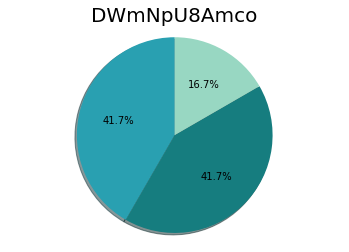

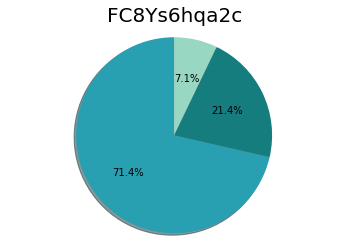

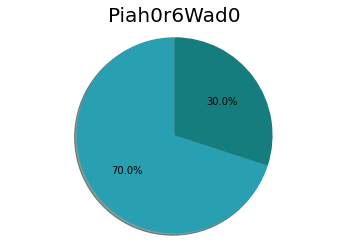

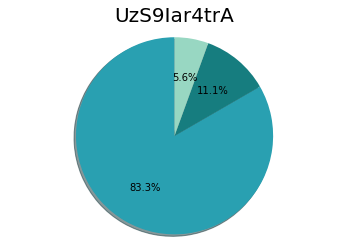

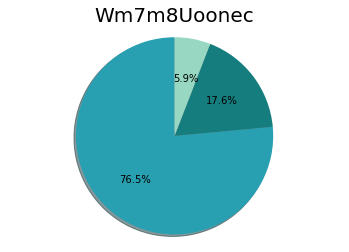

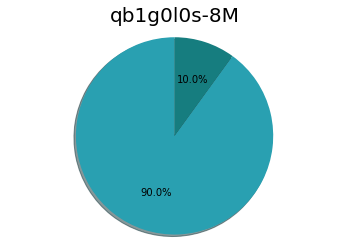

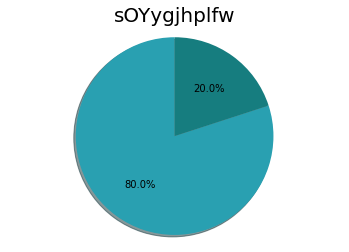

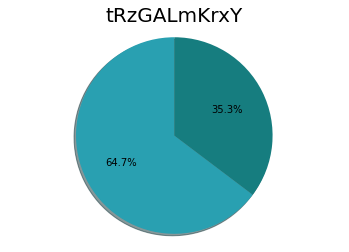

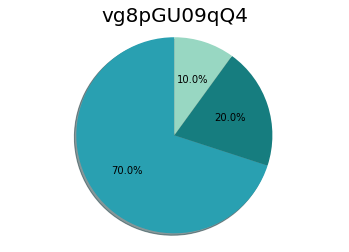

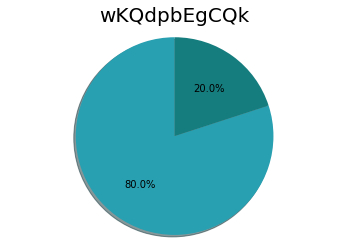

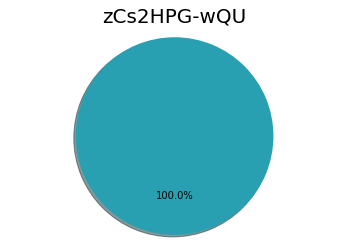

In [129]:

labels = 'Positivo', 'Neutro', 'Negativo' 
colors = ['#29A0B1','#167D7F','#98D7C2']

for a, id in enumerate(table.id.unique()):
        listav = []
        for i in range(df2.Comment.shape[0]): 
                if df2['id'][i] == id:
                        listav.append(df2['Result'][i])
        plt.pie(pd.Series(listav).value_counts(), colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
        plt.title(id, fontsize = 20)
        plt.axis('equal')
        plt.show()

In [86]:

text = ' '.join(df2.clean_text)


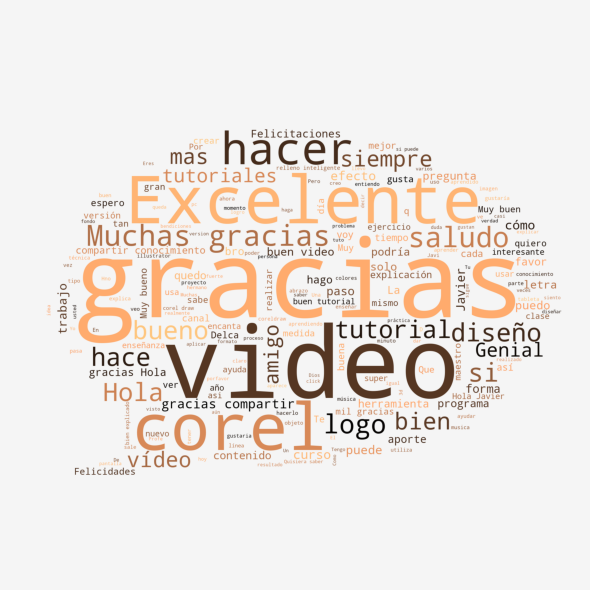

In [87]:
mask = np.array(Image.open('comment.png'))
wordcloud = WordCloud(width=1024, height=800, background_color='whitesmoke', colormap= 'copper', min_font_size=14, mask = mask).generate(text)
plt.figure(figsize= (8, 8), facecolor=None).patch.set_facecolor('whitesmoke')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7377d29e-ada8-4781-9a6b-60a54a1f06a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>